# 기계학습및설계 프로젝트

# 전처리(패키지 불러오기)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"C:\Users\leeyh\OneDrive\문서\기계학습및설계") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

In [2]:
# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

C:\Users\leeyh\AppData\Local\Temp\ipykernel_21472\1979260110.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/


# 데이터 불러오기

In [3]:
#데이터 일부 확인
df=pd.read_csv("winequality-red.csv",encoding='euc-kr') 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 데이터 통계

In [4]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
df.isnull().sum().to_frame('nan_count')

,nan_count
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
# 변수 타입 파악
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#통계량 파악
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Pandas Profiling Report(ing)

In [7]:
#importing library Profile Report from Pandas Profiling library
#!pip install ruamel-yaml
#!pip install markupsafe==2.0.1
#!pip install pandas-profiling==2.8.0

#!pip install pydantic

#import pandas as pd
#import pandas_profiling

#df.profiling_report()


In [8]:
#!pip uninstall pandas_profiling

In [9]:
#Performing Profile Report on the dataset to get the entire statistical report of the dataset in a detailed manner

#ProfileReport(df)

# EDA 분석

### HEATMAP

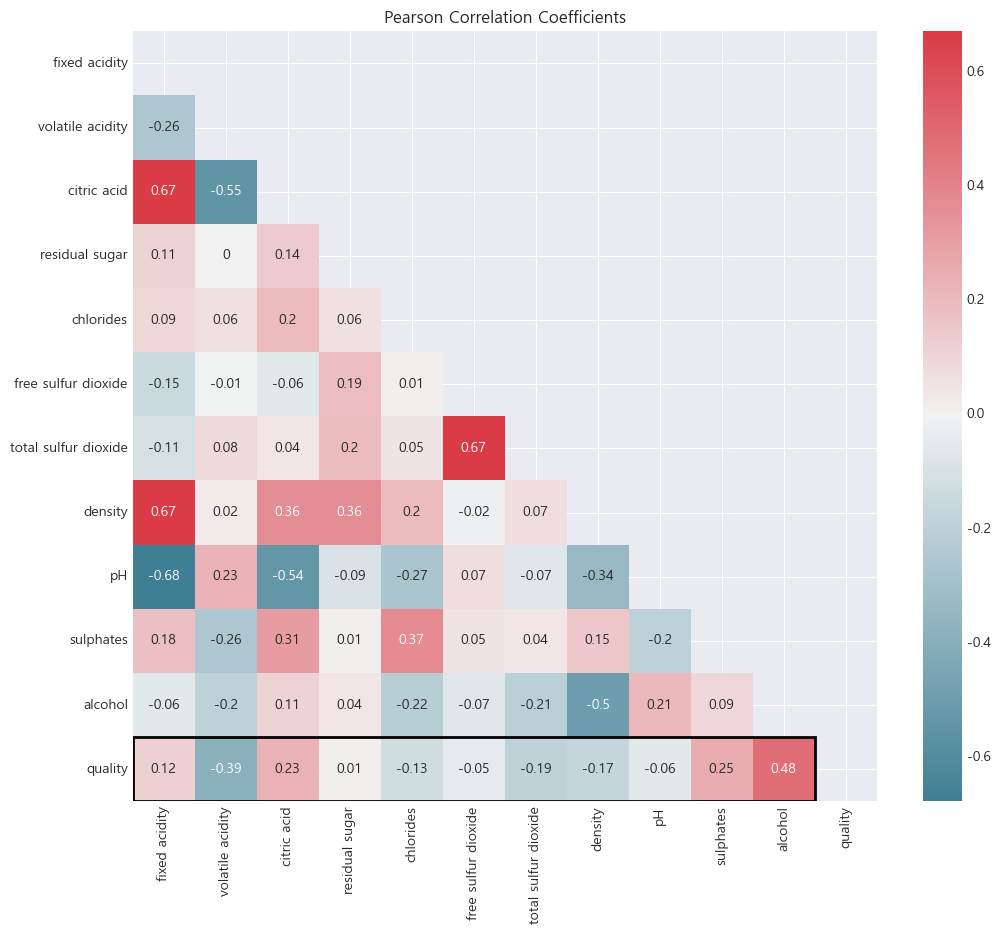

In [10]:
# 전체 데이터에 대한 상관관계 HeatMap 시각화
corr = round(df.corr(), 2)
plt.figure(figsize=(12,10))
plt.title("Pearson Correlation Coefficients")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(corr, cmap=cmap, annot=True, mask=mask)

rect_x = 0
rect_y = 11
rect_width = 11
rect_height = 1
rect = plt.Rectangle((rect_x, rect_y), rect_width, rect_height, linewidth=2, edgecolor='black', facecolor='none')
plt.gca().add_patch(rect)
plt.show()

#0.8 이상: 강한 상관관계, 0.4~0.8: 중간의 상관관계, 0.4 이하: 약한 상관관계
#결과적으로, (fixed acidity-citric acid: 0.67)/(fixed acidity-density: 0.67)/(free sulfur dioxide-total sulfur dioxide: 0.67)
#(quality-alcohol:0.48)/(pH-fixed cidity: -0.68)/(citric acid-volatile acidity :-0.55)-> 중간정도의 상관관계


### BOXPLOT

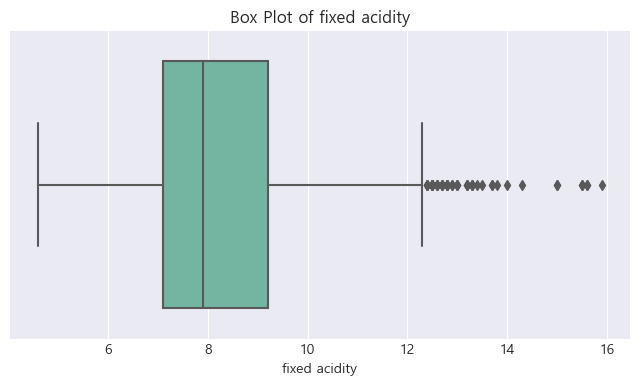

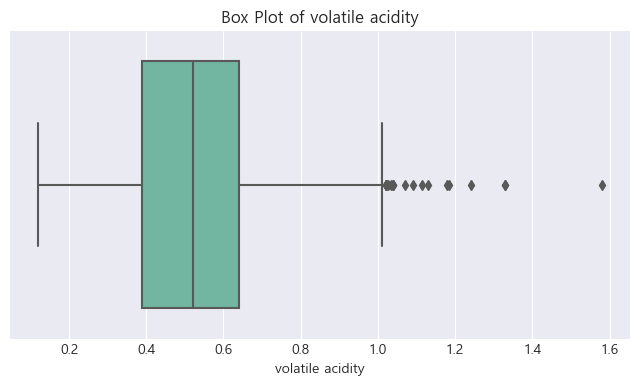

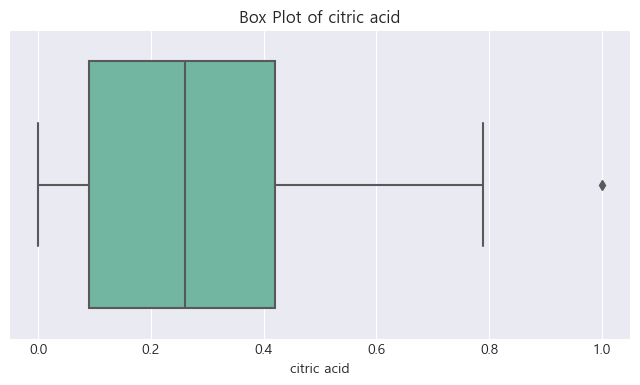

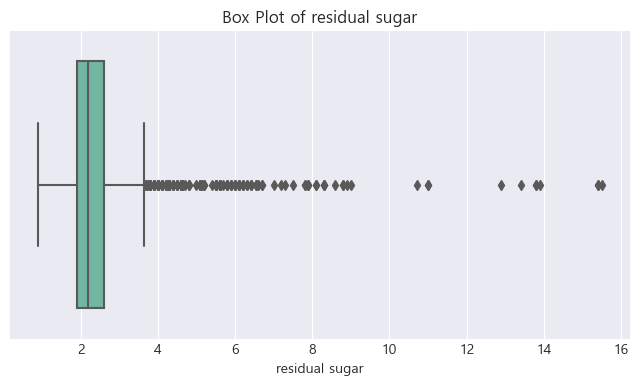

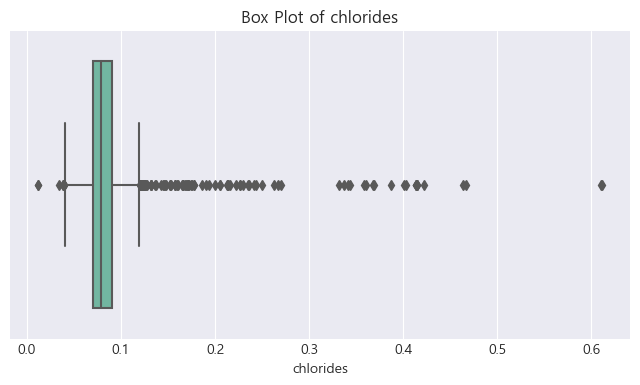

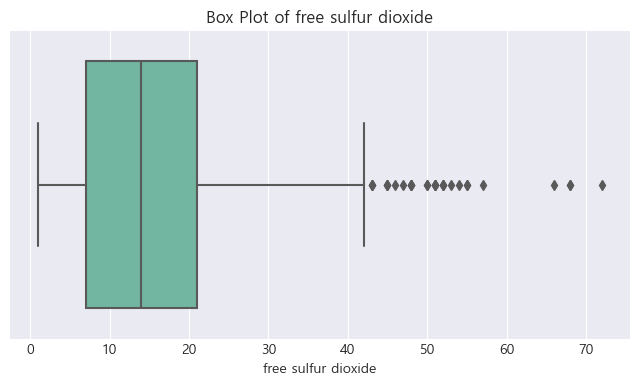

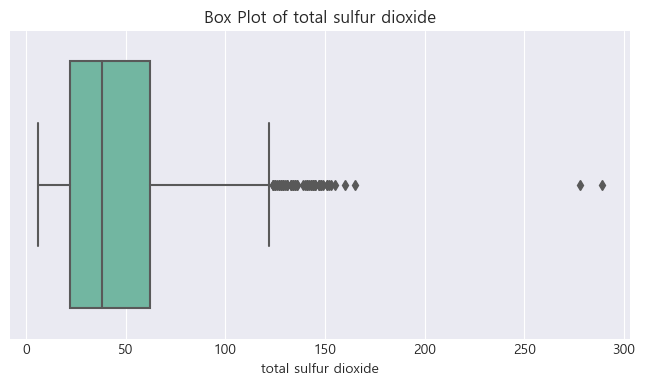

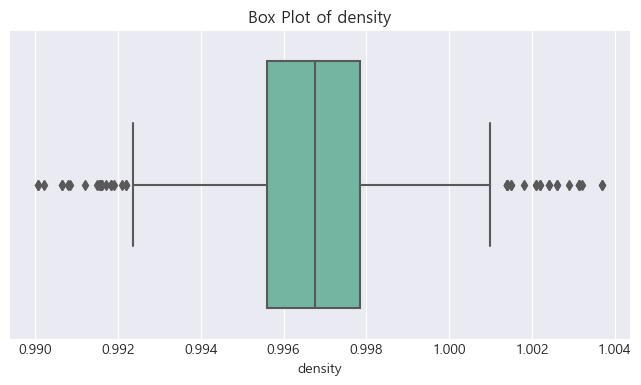

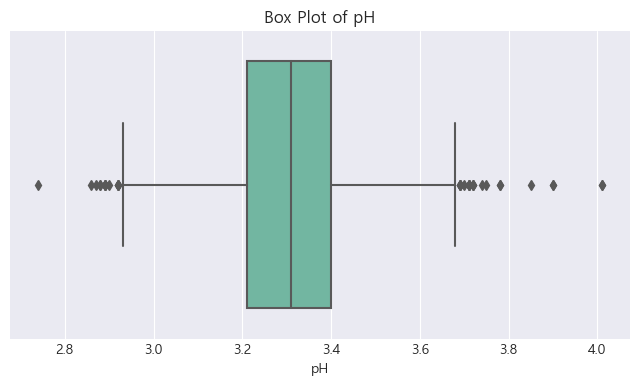

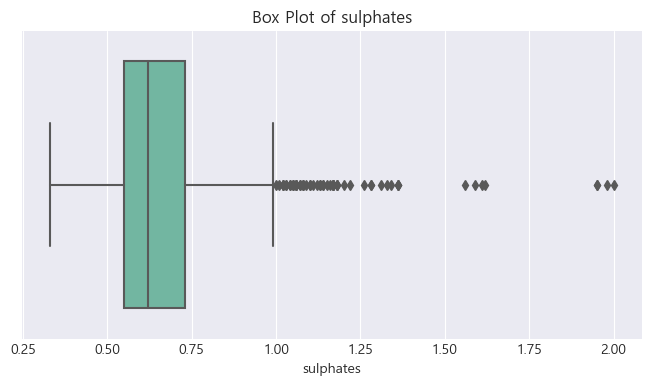

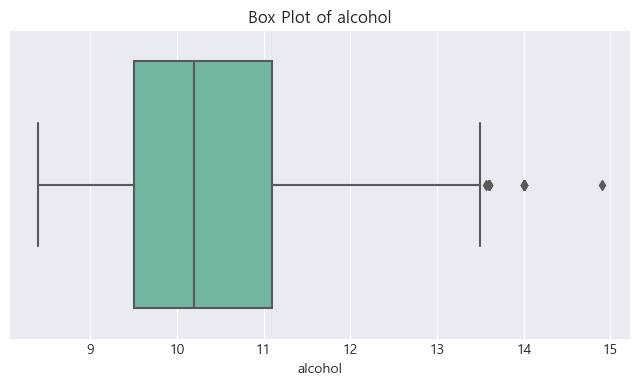

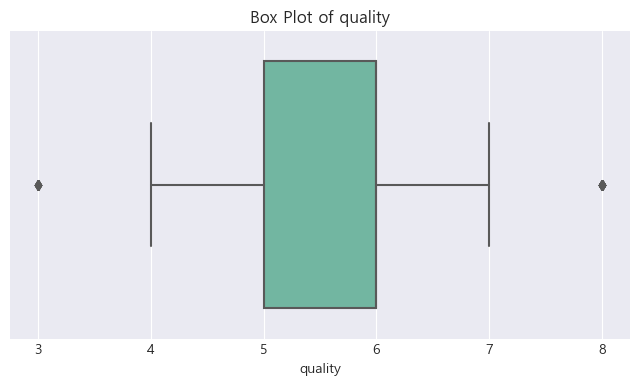

In [11]:
#Boxplot of all variables
columns_to_plot = df.columns
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {col}')
    sns.boxplot(data=df, x=col, palette="Set2")
    plt.show()

### 품질(종속변수)의 COUNTPLOT

Text(0.5, 1.0, 'Count of Wine Quality')

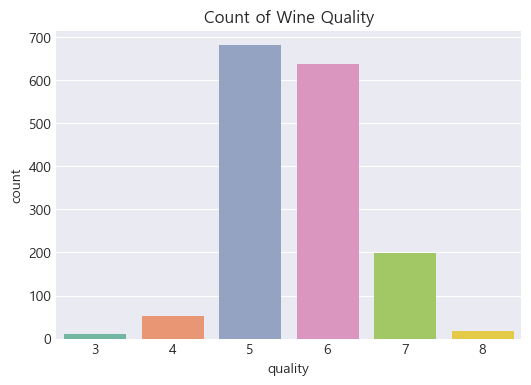

In [12]:
#Countplot of Quality Variable
plt.figure(figsize=(6, 4))
sns.countplot(x="quality", data=df, palette="Set2")
plt.title("Count of Wine Quality")

#결과적으로, quality 변수는 3-8까지만 존재함을 알 수 있다.

### VIOLIN PLOT

Text(0.5, 1.0, 'Violin Plot of Alcohol by Wine Quality')

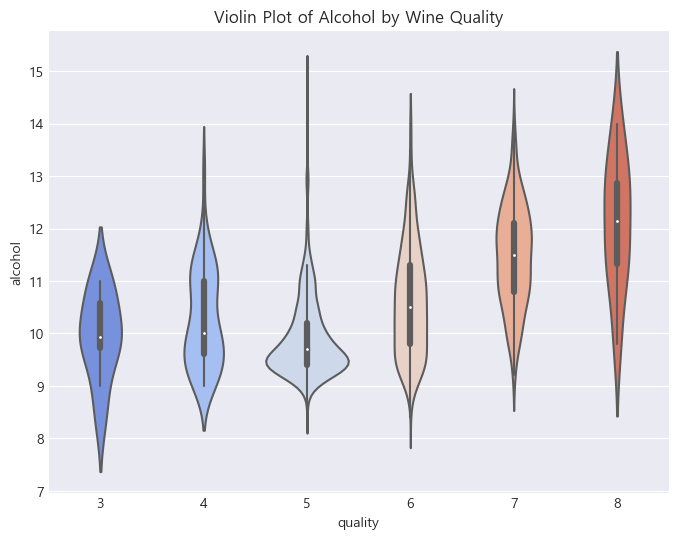

In [13]:
#바이올린 플롯(alcohol-quality), 품질과 상관계수가 가장 높은 alcohol 변수
plt.figure(figsize=(8, 6))
sns.violinplot(x="quality",y="alcohol", data=df, palette="coolwarm")
plt.title("Violin Plot of Alcohol by Wine Quality")

### 표준화 

In [14]:
#Standardization 표준화..?
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df.iloc[:,:-1]=std.fit_transform(df.iloc[:,:-1]) #Standardize data set except dependent value(Quality feature)

# EDA 분석-(1) 히스토그램

#### 1. 데이터의 분포:  
데이터가 어떤 구간에 집중되어 있는지, 전체적인 분포 형태가 어떤지 등을 파악
#### 2. 중심 경향성: 
데이터의 중심 경향성, 즉 평균이나 중앙값이 어디에 위치하는지를 파악/히스토그램이 좌우 대칭인 경우에는 중심 경향성이 뚜렷하게 나타날 수 있음
#### 3. 변이 정도: 
히스토그램이 높고 좁으면 데이터가 변이가 적은 경향이 있고, 낮고 넓으면 변이가 큰 경향
#### 4. 이상치 확인: 
극단적인 값이 특정 구간에 집중되어 있는 경우
#### 5. 다중 히스토그램 비교: 
여러 데이터셋의 히스토그램을 비교하면 두 데이터셋 간의 차이를 파악

In [15]:
#import matplotlib.pyplot as plt
#import numpy as np

#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # 1행 3열의 서브플롯 생성

#for i in range(12):
    #axes[i].hist(df[:, i], bins=20, alpha=0.5, edgecolor='black')
    
#plt.show()

# EDA 분석-(2) Pairplot 

#### 1. 변수간의 상관관계:
산점도를 통해 변수 간의 선형 또는 비선형 상관관계를 확인/두 변수 간의 점들이 어떻게 분포되어 있는지를 확인하여 상관성의 강도와 방향을 파악
#### 2. 변수의 분포:
변수가 정규분포에 가까운지, 왜도가 있는지, 이상치가 있는지 등을 확인
#### 3. 이상치 식별:
산점도에서 특이한 점들이 나타나면 이는 이상치일 가능성/이상치가 어떤 변수들 간에 나타나는지 확인
#### 4. 다중 공선성: 
변수 간의 강한 상관관계는 다중 공선성의 가능성/다중 공선성은 회귀 분석 등에서 문제를 일으킬 수 있는데, Pairplot을 통해 변수 간의 상관성을 시각적으로 확인
#### 5. 클래스 간의 차이:
데이터가 여러 클래스로 나누어져 있는 경우, 클래스 간의 차이를 확인

In [16]:
#sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True)

# EDA 분석-(3) 산점도

#### 1. 상관관계 확인:
산점도에서 가장 기본적인 정보는 두 변수 간의 상관관계
#### 2. 선형성 확인: 
점들이 직선에 가깝게 모여있다면 선형 관계가 강한 것이며, 그렇지 않다면 비선형 관계
#### 3. 이상치 식별:
특히, 다른 점들과는 뚜렷하게 차이가 나는 점들은 주의
#### 4. 밀도 추정:
점들이 모여 있는 지역은 데이터가 밀집되어 있다는 것

In [17]:
#fig, axes = plt.subplots(2, 2, figsize=(15, 10))
#axes = axes.flatten()

#sns.scatterplot(ax = axes[0],
               # x = "residual_sugar",
               # y = "quality", hue = "quality",
               # data = df).set(title = "Relationship between 'residual_sugar' and 'quality'");

#sns.scatterplot(ax = axes[1],
                #x = "alcohol",
                #y = "quality", hue = "quality",
                #data = df).set(title = "Relationship between 'alcohol' and 'quality'");

#sns.scatterplot(ax = axes[2],
                #x = "pH",
                #y = "quality", hue = "quality",
                #data = df).set(title = "Relationship between 'pH' and 'quality'");

#sns.scatterplot(ax = axes[3],
                #x = "density",
                #y = "quality", hue = "quality",
                #data = df).set(title = "Relationship between 'density' and 'quality'");

# EDA 분석-(5) Regplot 

#### RegPlot은 Regression Plot의 약자이다.
데이터의 분포와, 이 데이터를 선형으로 표현하는 Regression Line을 동시에 표현해주는 그래프이다.

In [18]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


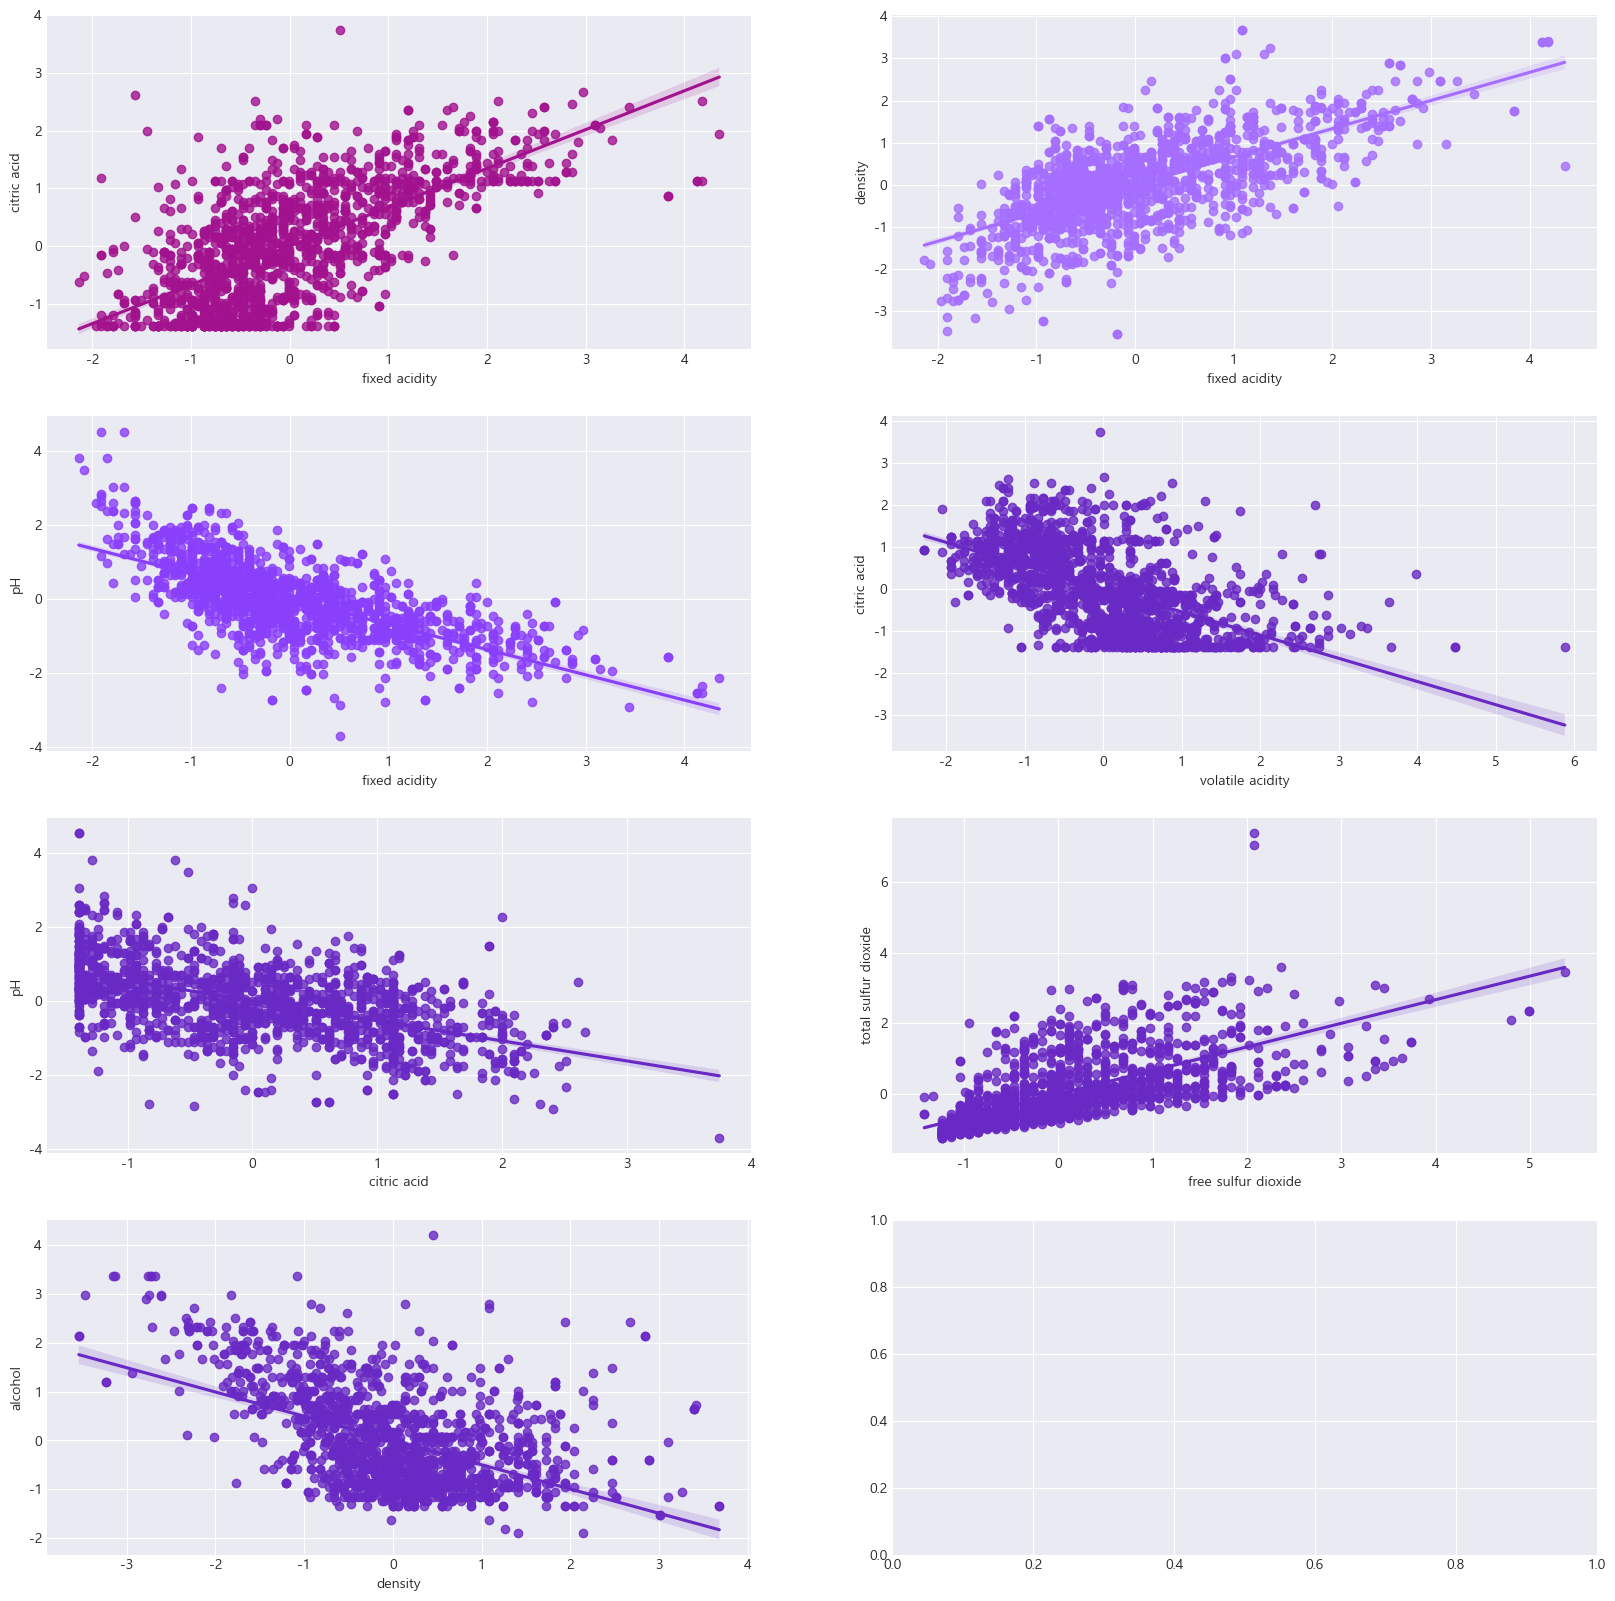

In [19]:
fig, axes = plt.subplots(4, 2, figsize = (20, 20))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "fixed acidity", y = "citric acid", data = df, color = "#A2128E");
sns.regplot(ax = axes[1], x = "fixed acidity", y = "density", data = df, color = "#A56EFF");
sns.regplot(ax = axes[2], x = "fixed acidity", y = "pH", data = df, color = "#8A3FFC");
sns.regplot(ax = axes[3], x = "volatile acidity", y = "citric acid", data = df, color = "#6929C4");
sns.regplot(ax = axes[4], x = "citric acid", y = "pH", data = df, color = "#6929C4");
sns.regplot(ax = axes[5], x = "free sulfur dioxide", y = "total sulfur dioxide", data = df, color = "#6929C4");
sns.regplot(ax = axes[6], x = "density", y = "alcohol", data = df, color = "#6929C4");

###### 절댓값으로 한 값으로 0.5 이상인 관계만 나타내었음(7가지 관계)

# EDA분석-(6)Hexagonal Binned Plot(육각형 격자 그림)
hexbin plot은 산점도를 히스토그램 형태의 육각형(binning)으로 표현한 그래픽이다. 이는 seaborn과 Matplotlib 같은 시각화 라이브러리에서 제공되며, 주로 두 변수 간의 관계를 효과적으로 시각화하기 위해 사용된다.

### 기존의 산점도와의 다른점(차별점)
기존의 산점도는 데이터 포인트의 밀도가 높아질수록 점이 겹쳐져 가독성이 떨어질 수 있다. hexbin plot은 이러한 문제를 해결하기 위해 데이터를 육각형으로 나누고 각 육각형에 속하는 데이터 포인트의 개수를 색상으로 표현한다.

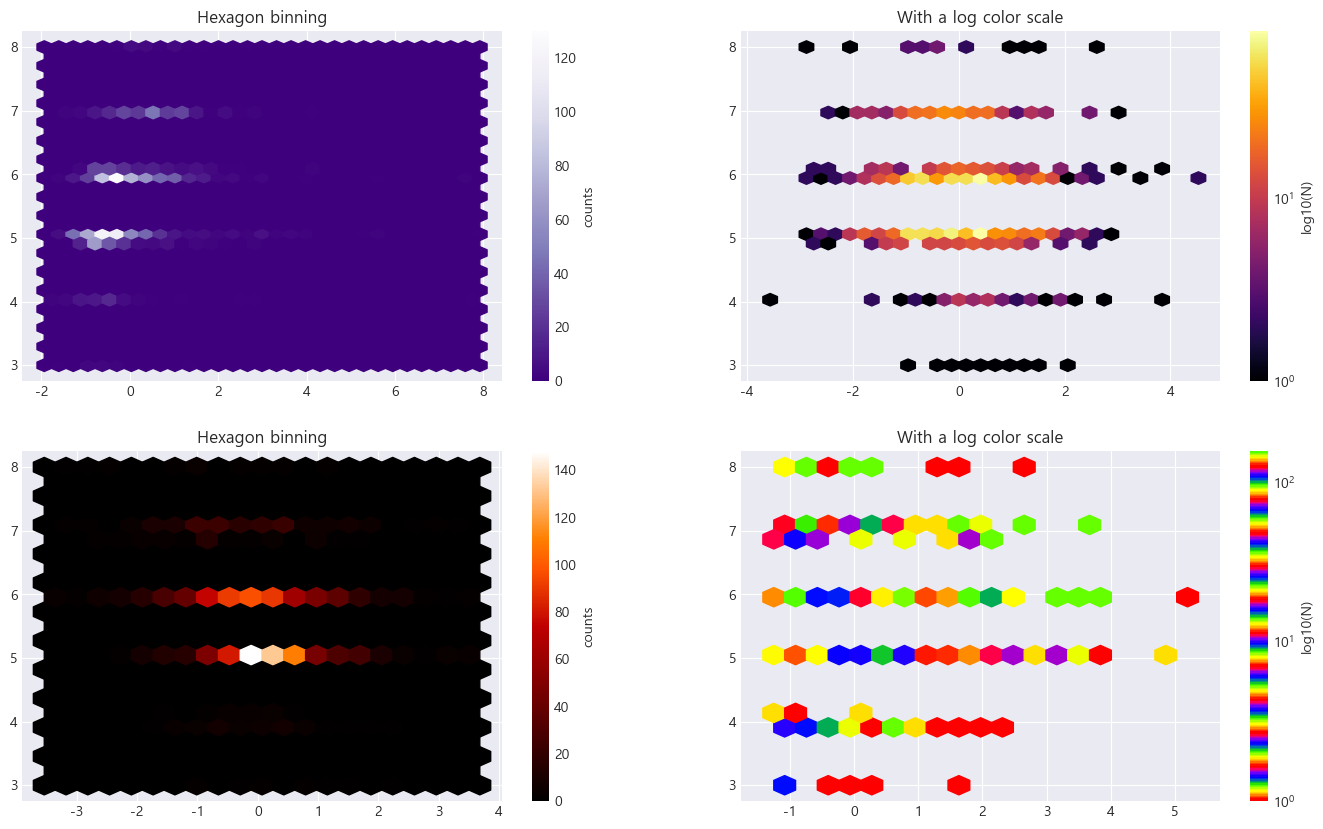

In [20]:
fig, ([ax0, ax1], [ax2, ax3]) = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 10))

hb = ax0.hexbin(df["sulphates"], df["quality"], gridsize = 30, cmap = 'Purples_r')
ax0.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax0, label = 'counts')


hb = ax1.hexbin(df["pH"], df["quality"], gridsize = 30, bins = 'log', cmap = 'inferno')
ax1.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax1, label = 'log10(N)')


hb = ax2.hexbin(df["density"], df["quality"], gridsize = 20, cmap = 'gist_heat')
ax2.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax = ax2, label = 'counts')

hb = ax3.hexbin(df["free sulfur dioxide"], df["quality"], gridsize = 20, bins = 'log',
                cmap = 'prism')
ax3.set_title("With a log color scale")
cb = fig.colorbar(hb, ax = ax3, label = 'log10(N)')

plt.show()

#### 우선 위 코드의 출력 그림에서는,
(1) x-황산염, y-품질
(2) x-pH, y-품질
(3) x-밀도, y-품질
(4) x-자유황산염, y-품질

를 나타내고 있다.

# 데이터 전처리 

#### 데이터가 5,6 수치로 치우쳐 있는 것 해결(클래스 간의 불균형)

#### 1. 변수 변환

##### 1.1 박스 콕스 변환방법 (Box-Cox)
: 정규분포가 아닌 데이터를 정규분포에 가깝게 만들거나 데이터의 분산을 안정시켜 정상(Stationary) 데이터로 변환시키는 기법

:이 변환은 데이터가 양수이고 0이 아닌 값만 사용 가능하며, 변환 파라미터(람다, λ)를 통해 변환의 정도를 조절/ 변환된 데이터는 정규성을 갖도록 만들어줌.

### *변환할 변수를 선택한 기준: '왜도와 첨도가 0과 1로부터 거리가 먼 변수, 3가지'

In [21]:
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df=pd.read_csv("winequality-red.csv",encoding='euc-kr') 
min(df['residual sugar'])

0.9

In [23]:
# Box-Cox 변환
transformed_data1, lambda_value1 = boxcox(df['residual sugar'])
transformed_data2, lambda_value2 = boxcox(df['chlorides'])
transformed_data3, lambda_value3 = boxcox(df['sulphates'])

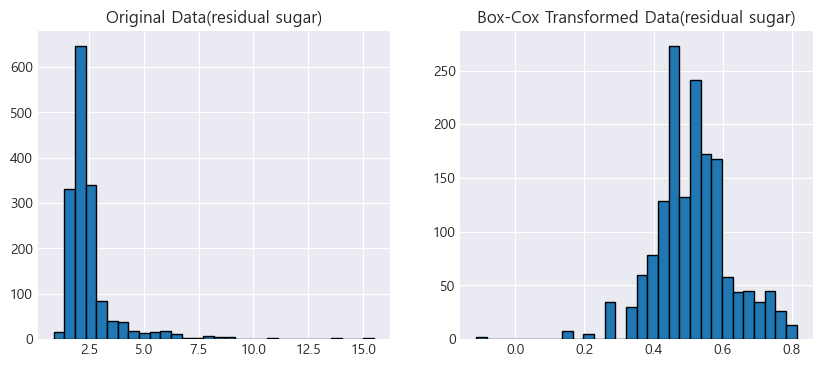

In [24]:
# 변환 전 후의 분포 비교(['residual sugar'])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# 변환 전
ax[0].hist(df['residual sugar'], bins=30, edgecolor='black')
ax[0].set_title('Original Data(residual sugar)')

# Box-Cox 변환 후
ax[1].hist(transformed_data1, bins=30, edgecolor='black')
ax[1].set_title('Box-Cox Transformed Data(residual sugar)')

plt.show()

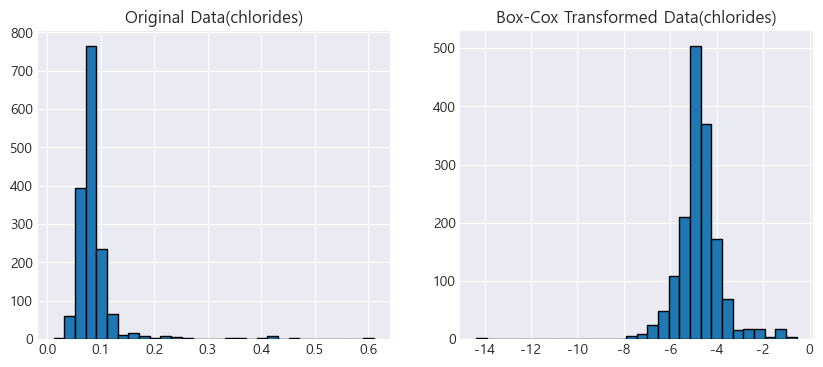

In [25]:
# 변환 전 후의 분포 비교(['chlorides'])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# 변환 전
ax[0].hist(df['chlorides'], bins=30, edgecolor='black')
ax[0].set_title('Original Data(chlorides)')

# Box-Cox 변환 후
ax[1].hist(transformed_data2, bins=30, edgecolor='black')
ax[1].set_title('Box-Cox Transformed Data(chlorides)')

plt.show()

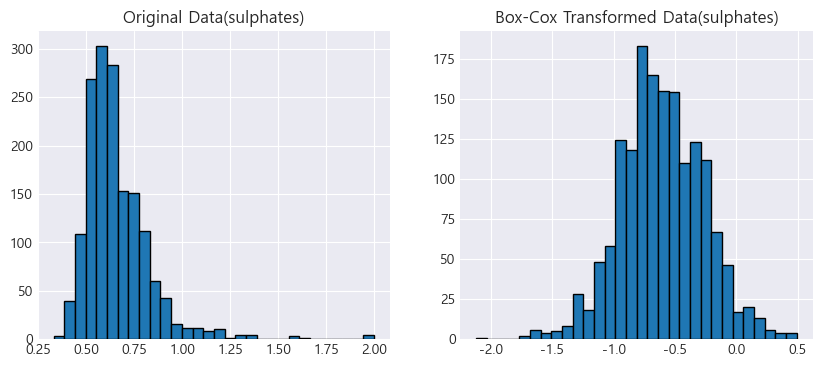

In [26]:
# 변환 전 후의 분포 비교(['sulphates'])
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# 변환 전
ax[0].hist(df['sulphates'], bins=30, edgecolor='black')
ax[0].set_title('Original Data(sulphates)')

# Box-Cox 변환 후
ax[1].hist(transformed_data3, bins=30, edgecolor='black')
ax[1].set_title('Box-Cox Transformed Data(sulphates)')

plt.show()

In [27]:
print(f"residual sugar의 최적의 람다(λ) 값: {lambda_value1}")
print(f"chlorides의 최적의 람다(λ) 값: {lambda_value1}")
print(f"sulphates의 최적의 람다(λ) 값: {lambda_value1}")

residual sugar의 최적의 람다(λ) 값: -1.180347626085983
chlorides의 최적의 람다(λ) 값: -1.180347626085983
sulphates의 최적의 람다(λ) 값: -1.180347626085983


##### 1.2 로그 변환( log transformation)
: skewness(왜도)를 제거하기 위해 가장 먼저 해볼 수 있는 방법이다

In [28]:
# 변환 전, 왜도/첨도 확인

print("residual sugar:",skew(df['residual sugar']),kurtosis(df['residual sugar'], fisher=True))
print("chlorides:",skew(df['chlorides']),kurtosis(df['chlorides'], fisher=True))
print("sulphates:",skew(df['sulphates']),kurtosis(df['sulphates'], fisher=True))

NameError: name 'skew' is not defined

In [29]:
# 로그 변환
df_log1 = np.log(df['residual sugar'])
df_log2 = np.log(df['chlorides'])
df_log3 = np.log(df['sulphates'])

In [30]:
#변환 후, 왜도/첨도 확인

print("residual sugar:",df_log1.skew(), df_log1.kurtosis())
print("chlorides:",df_log2.skew(), df_log2.kurtosis())
print("sulphates:",df_log3.skew(), df_log3.kurtosis())

residual sugar: 1.8068638195807207 4.9485821708388595
chlorides: 1.7452154426856812 9.396518943302347
sulphates: 0.9218673620869906 2.1158211970790326


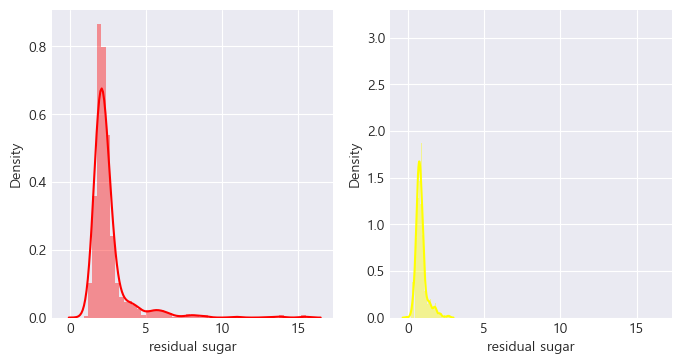

In [31]:
# 그래프 비교1
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

sns.distplot(df['residual sugar'],color='red', ax=axes[0])
sns.distplot(df_log1, color='yellow', ax=axes[1])
plt.show()

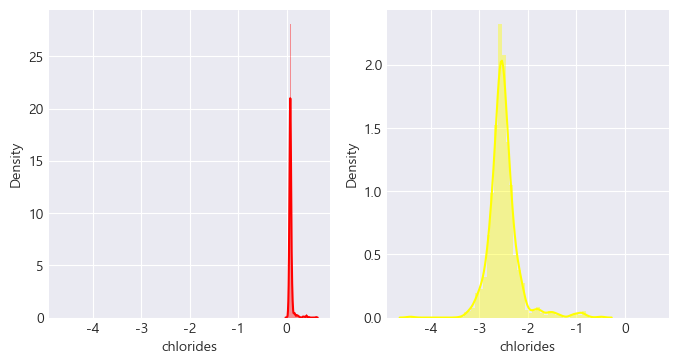

In [32]:
# 그래프 비교2
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

sns.distplot(df['chlorides'],color='red', ax=axes[0])
sns.distplot(df_log2, color='yellow', ax=axes[1])
plt.show()

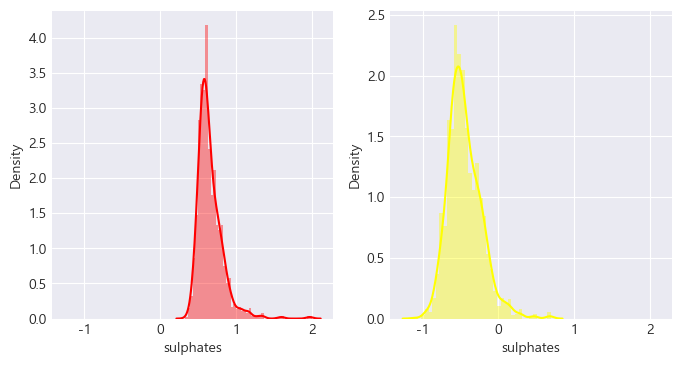

In [33]:
# 그래프 비교3
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

sns.distplot(df['sulphates'],color='red', ax=axes[0])
sns.distplot(df_log3,color='yellow', ax=axes[1])
plt.show()

##### 1.3 루트 변환( lSquare Root Transform)
: 제곱근을 취함으로써 데이터의 왜곡 정도를 줄일 수 있습니다.

In [34]:
import numpy as np

# 루트 변환
df_root1 = np.sqrt(df['residual sugar'])
df_root2 = np.sqrt(df['chlorides'])
df_root3 = np.sqrt(df['sulphates'])

In [35]:
# 바뀐 왜도/첨도 확인
print("residual sugar:",df_root1.skew(),df_root1.kurtosis())
print("chlorides:",df_root2.skew(),df_root2.kurtosis())
print("sulphates:",df_root3.skew(),df_root3.kurtosis())

residual sugar: 2.9567627473692695 12.496150542290835
chlorides: 3.708789126321946 20.55827197178423
sulphates: 1.5545420946183741 5.216628509135225


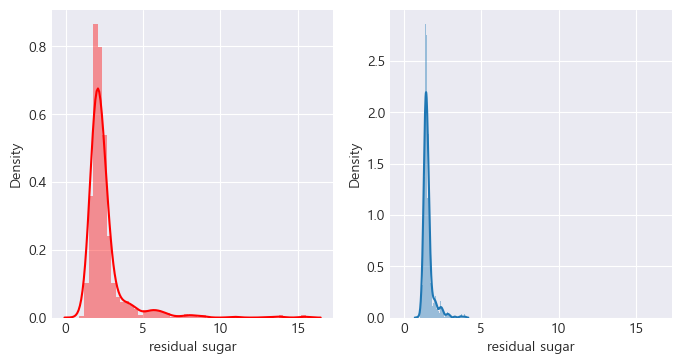

In [36]:
#그래프 비교1
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

sns.distplot(df['residual sugar'],color='red', ax=axes[0])
sns.distplot(df_root1, ax=axes[1])
plt.show()

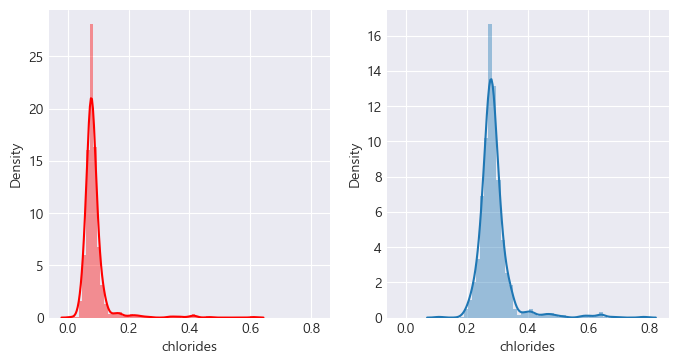

In [37]:
#그래프 비교2
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

sns.distplot(df['chlorides'],color='red', ax=axes[0])
sns.distplot(df_root2, ax=axes[1])
plt.show()

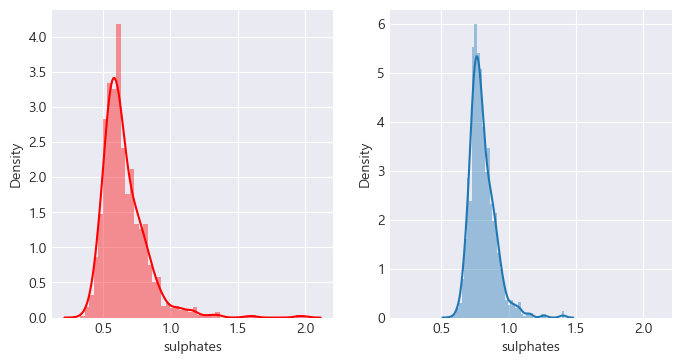

In [38]:
#그래프 비교3
f, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

sns.distplot(df['sulphates'],color='red', ax=axes[0])
sns.distplot(df_root3, ax=axes[1])
plt.show()

# 테스트 데이터&트레인 데이터

In [ ]:
from sklearn.model_selection import train_test_split
X = df[df.columns.difference(['quality'])]
y = df[['quality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(df.shape)

# (1)SelectKBest 모듈 활용하여 변수 선택

#####
scikit-learn의 SelectKBest 모듈은 target 변수와 그외 변수 사이의 상관관계를 계산하여 가장 상관관계가 높은 변수 k개를 선정할 수 있는 모듈입니다. 상관관계를 분석하는 방법은 f-regression 방식과 chi2(카이제곱)방식, f-classif 등이 있습니다. 본 분석에서는 f-regression을 사용했습니다.

In [ ]:
# target(quality)와 가장 correlated 된 features 를 k개 고르기.
## f_regresison, SelectKBest 불러오기.
from sklearn.feature_selection import f_regression, SelectKBest
## selctor 정의하기.
selector = SelectKBest(score_func=f_regression, k=5)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape

##### 
위 결과값을 보면, 컬럼수가 5개로 줄어든 것을 확인할 수 있습니다. SelectKbest모듈이 타겟변수와 상관관계가 높은 5개 컬럼을 선정한 것인데요, 상세하게 어떤 컬럼을 선정했는지 살펴보겠습니다.

In [ ]:
all_names = X_train.columns
## selector.get_support()
selected_mask = selector.get_support()
## 선택된 특성(변수)들
selected_names = all_names[selected_mask]
## 선택되지 않은 특성(변수)들
unselected_names = all_names[~selected_mask]
print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)